In [1]:
# Setup logging
from timeseria import logger
logger.setup(level='INFO')

# Set default plot type as image
import os
os.environ["DEFAULT_PLOT_TYPE"] = "image"

⚠️ In this notebook, plots are configured to be rendered as images because otherwise they won't display correctly on GitHub or when the notebook is loaded (usually because not [trusted](https://stackoverflow.com/questions/44943646/jupyter-notebook-not-trusted)). To get interactive plots, remove the line above (or change it to "interactive") and re-run the notebook.

# Anomaly detection on temperature and humidity with LSTM


This notebook showcases the LSTM anomaly detector of [Timeseria](https://github.com/sarusso/Timeseria).

Anomlay detection is achieved in a model-based dashion, meaning that a forecaster is trained to make predictions which are than compared to the actual data: the more they differ, the grater the anomaly index will be.

The first step is to get a demo temperature and humidity time series, slice it to make it shorter, and resample it to one hour:

In [2]:
from timeseria import TEST_DATASETS_PATH
from timeseria.datastructures import TimeSeries
timeseries = TimeSeries.from_csv(TEST_DATASETS_PATH + 'humitemp_long.csv')[1500:5000].resample('1h')

[INFO] timeseria.transformations: Using auto-detected sampling interval: 615.0s
[INFO] timeseria.transformations: Resampled 3500 DataTimePoints in 598 DataTimePoints


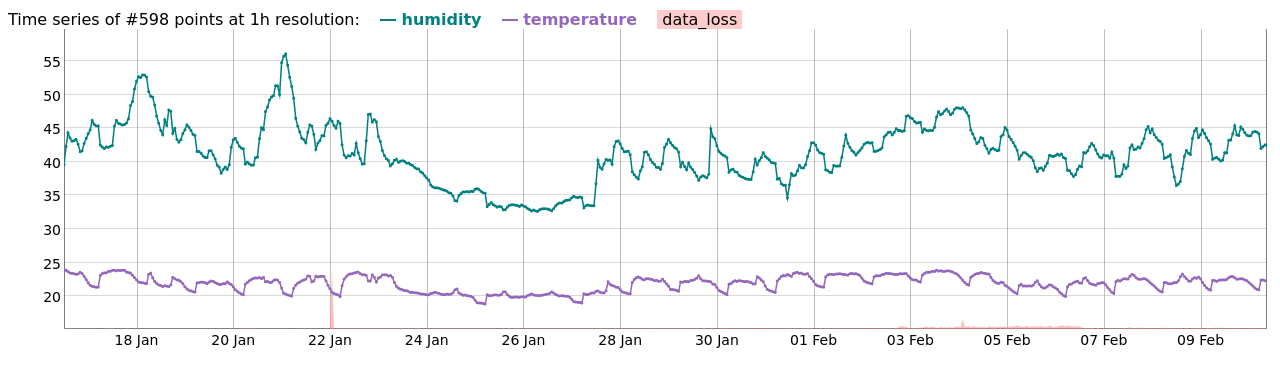

In [3]:
timeseries.plot()

### LSTM anomaly detection without context
Let's fit, inspect and apply the LSTM anomaly detector wihtout context, which is the default behaviour. This means that only past data will be used to make the predictions, not current step, contextual one.

In [4]:
from timeseria.models import LSTMAnomalyDetector
anomaly_detector = LSTMAnomalyDetector()
anomaly_detector.fit(timeseries, epochs=5, verbose=False, with_context=False, reproducible=True)

[INFO] timeseria.models.anomaly_detectors: Predictive model(s) fitted, now evaluating...
[INFO] timeseria.models.anomaly_detectors: Computing actual vs predicted for "humidity"...
[INFO] timeseria.models.anomaly_detectors: Computing actual vs predicted for "temperature"...
[INFO] timeseria.models.anomaly_detectors: Model(s) evaluated, now computing the error distribution(s)...
[INFO] timeseria.models.anomaly_detectors: Anomaly detector fitted



Details for: "humidity"
Predictive model avg error (abs): 0.03529798233606002
Predictive model min error (abs): 5.0765339839421214e-06
Predictive model max error (abs): 0.1447343025326963
Error metric: PE
Error distribution: gennorm
Error distribution params: {'beta': 1.8055908792434865, 'loc': -0.009290931307651091, 'scale': 0.05841750839997577}
Error distribution stats: {'sumsquare_error': 289.15107585181903, 'aic': -82.88706981724613, 'bic': -69.7264318591582, 'kl_div': inf, 'ks_statistic': 0.02926620606475061, 'ks_pvalue': 0.6777602312808123}


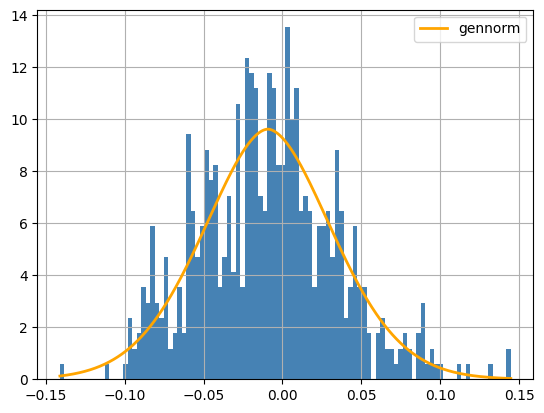


Details for: "temperature"
Predictive model avg error (abs): 0.02256211055456197
Predictive model min error (abs): 7.845554725567058e-05
Predictive model max error (abs): 0.08813313364243061
Error metric: PE
Error distribution: gennorm
Error distribution params: {'beta': 2.4887833031764988, 'loc': -0.0011038985917423852, 'scale': 0.0422290577473437}
Error distribution stats: {'sumsquare_error': 841.3558879464047, 'aic': -216.92463521438864, 'bic': -203.7639972563007, 'kl_div': inf, 'ks_statistic': 0.03307437309274125, 'ks_pvalue': 0.5234157903366325}


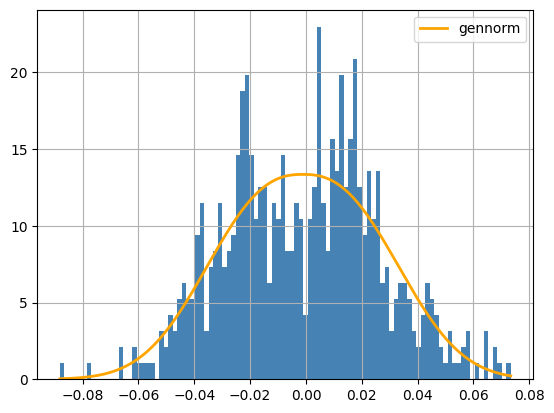

In [5]:
anomaly_detector.inspect()

In [6]:
result_timeseries = anomaly_detector.apply(timeseries)

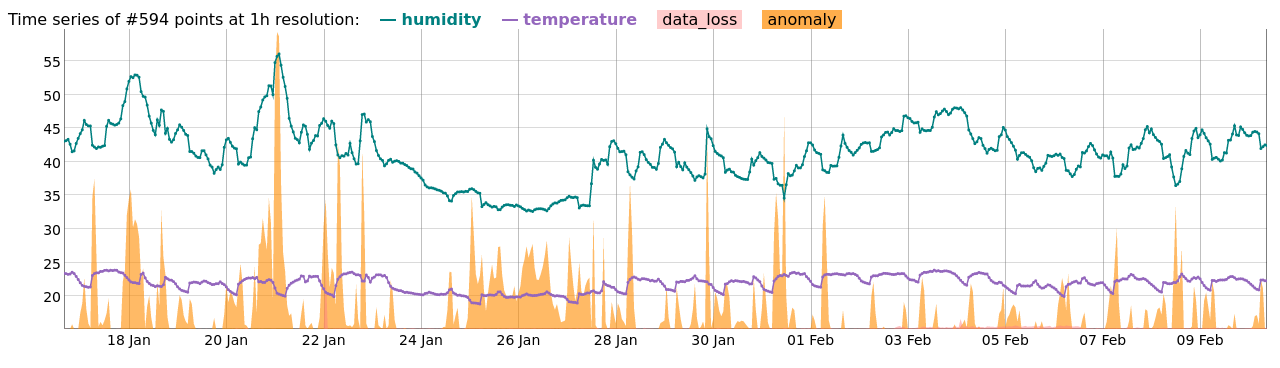

In [7]:
result_timeseries.plot()

### LSTM anomaly detection with context
Let's now fit, inspect and apply the LSTM anomaly detector which will instead make use of context. It will be slower, but much more powerful since when evaluating the anomaly index for a given data label at a given step, also the behaviour of all the others will be taken into account.

In [8]:
anomaly_detector = LSTMAnomalyDetector()
anomaly_detector.fit(timeseries, epochs=5, verbose=False, with_context=True, reproducible=True)

[INFO] timeseria.models.anomaly_detectors: Predictive model(s) fitted, now evaluating...
[INFO] timeseria.models.anomaly_detectors: Computing actual vs predicted for "humidity"...
[INFO] timeseria.models.anomaly_detectors: Computing actual vs predicted for "temperature"...
[INFO] timeseria.models.anomaly_detectors: Model(s) evaluated, now computing the error distribution(s)...
[INFO] timeseria.models.anomaly_detectors: Anomaly detector fitted



Details for: "humidity"
Predictive model avg error (abs): 0.023820679747401444
Predictive model min error (abs): 3.0036939860078732e-05
Predictive model max error (abs): 0.1459281811605037
Error metric: PE
Error distribution: gennorm
Error distribution params: {'beta': 1.2611494870328914, 'loc': -0.0028873538824714436, 'scale': 0.03113082400754708}
Error distribution stats: {'sumsquare_error': 388.0804427738848, 'aic': -41.752512299817994, 'bic': -28.59187434173006, 'kl_div': inf, 'ks_statistic': 0.0304144594670116, 'ks_pvalue': 0.6305684750589602}


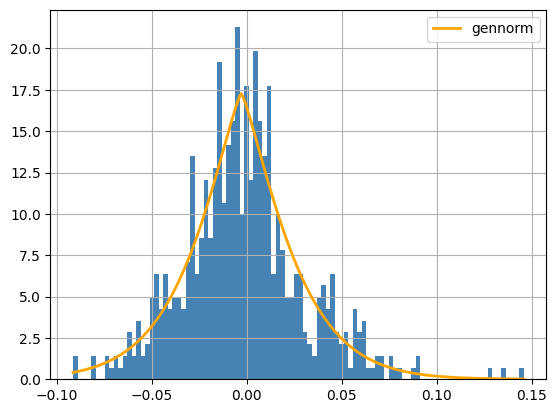


Details for: "temperature"
Predictive model avg error (abs): 0.020917152704619107
Predictive model min error (abs): 0.0001900766512257571
Predictive model max error (abs): 0.08174545413246408
Error metric: PE
Error distribution: gennorm
Error distribution params: {'beta': 2.2917093316287005, 'loc': 1.154665952209178e-05, 'scale': 0.03843010952672585}
Error distribution stats: {'sumsquare_error': 955.3701919942848, 'aic': -220.73102078068138, 'bic': -207.57038282259344, 'kl_div': inf, 'ks_statistic': 0.036347275386943934, 'ks_pvalue': 0.4029915119713158}


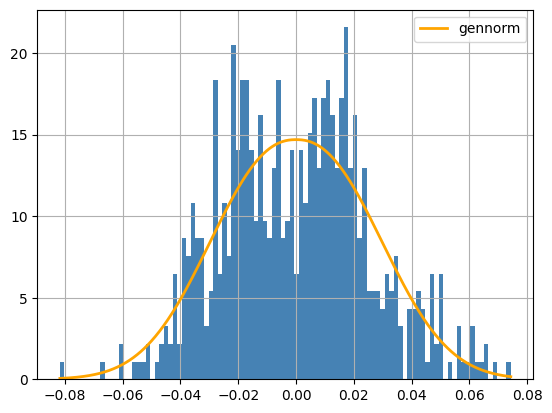

In [9]:
anomaly_detector.inspect()

In [10]:
result_timeseries = anomaly_detector.apply(timeseries)

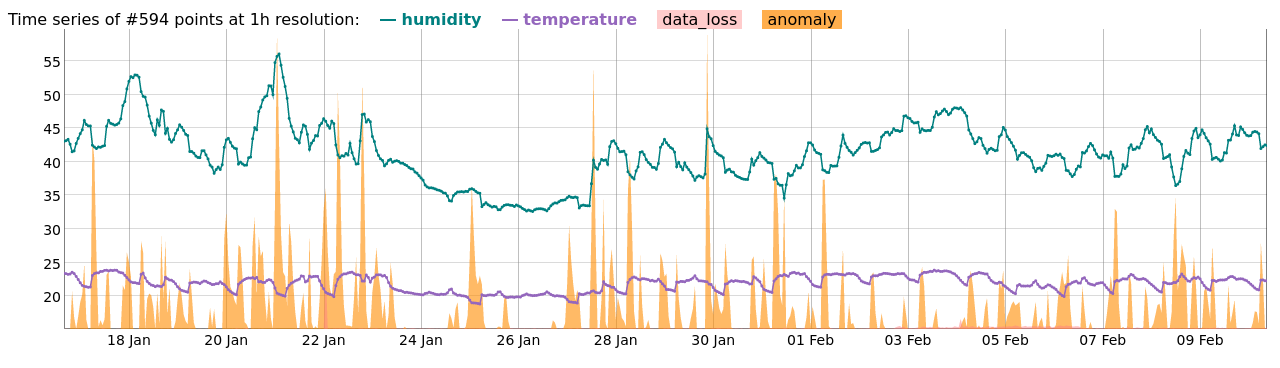

In [11]:
result_timeseries.plot()